# 회귀분석

### 1. 선형회귀분석의 활용

C:\Users\A\AppData\Local\Temp\ipykernel_16372\3573627417.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


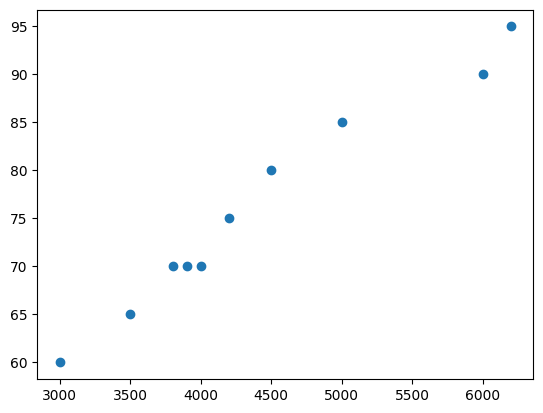

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step1: 연봉과 직장 만족도
    # 리스트 x에 독립변수인 연봉을 할당, 리스트 y에 종속변수인 직장 만족도를 할당
    # 맷플롯립의 scatter( ) 함수로 산점도를 그리면 산점도는 우상향 형태!
x = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500] # 연봉
y = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80] # 직장만족도
data = {'x': x, 'y': y}
df = pd.DataFrame(data)
plt.scatter(df['x'], df['y']) # 산점도 그리기
plt.show()

In [3]:
# Step1-2: '단순' 선형 회귀분석
    # 산점도를 보면 두 변수에 양의 상관관계가 있음을 알 수 있는데, 
    # 인과관계가 얼마나 강한지 선형 회귀분석으로 확인 하려한다
    # 선형 회귀모형은 다음과 같은 형태로 설정한다
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('y ~ x', data=df).fit()
print(fit.summary())

# Step1-3. 위 결과 분석
# 정리할때 결과 사진 및 ppt에

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.87e-07
Time:                        15:35:53   Log-Likelihood:                -20.111
No. Observations:                  10   AIC:                             44.22
Df Residuals:                       8   BIC:                             44.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0004      2.926      9.913      0.0

C:\Users\A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


In [4]:
# Step2: 직장 만족도의 요인 분석 & "다중" 선형 회귀 분석
# 연봉 외에 일평균 휴식시간(분)과 일평균 근무시간(시간) 추가하여 각 변수의 영향을 분석
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

salary = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
breakTime = [120, 60, 100, 100, 50, 120, 90, 40, 120, 120]
workingTime = [8, 6, 10, 8, 10, 10, 9, 7, 8, 9]
companySatisfaction = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]

data = {'salary': salary, 'breakTime': breakTime, 'workingTime': workingTime,
'companySatisfaction': companySatisfaction}

df = pd.DataFrame(data)

fit = ols('companySatisfaction ~ salary + breakTime + workingTime', data=df).fit()
print(fit.summary())

# p>|t|값은 0.05보다 큰 값은 의미없다고 여긴다 -> 이 변수는 제외하고 다시 산정해야 함

                             OLS Regression Results                            
Dep. Variable:     companySatisfaction   R-squared:                       0.988
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     164.0
Date:                 Mon, 01 Apr 2024   Prob (F-statistic):           3.81e-06
Time:                         15:35:53   Log-Likelihood:                -15.777
No. Observations:                   10   AIC:                             39.55
Df Residuals:                        6   BIC:                             40.77
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.9819      5.353      4

C:\Users\A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


### 2. 로지스틱 회귀 분석의 개념

In [5]:
# 로지스틱 회귀분석
import statsmodels.api as sm
import pandas as pd
import numpy as np

sales = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
price = [1500, 2000, 5000, 3000, 3500, 2500, 4000, 4500, 3000,\
4500, 4000, 4500, 5500, 6500, 5000, 3500, 7000]
data = {'sales': sales, 'price': price}
df = pd.DataFrame(data)

logis = sm.Logit.from_formula('sales ~ price', data=df).fit()
print(logis.summary())
print('OR')
print(np.exp(logis.params))
# 오즈비(OR아래) 수치보면, price 0.998433임
    # 이 뜻: 판.매.될(True) 확률이 판매되지 않을(False) 값의 0.998433배
    # 99배 이런게 아님. 1배보다 낮.다는 것임
    # 즉, 엄밀히 따져보면 판매되지 않.을 확률이 높다는 것

Optimization terminated successfully.
         Current function value: 0.430873
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  sales   No. Observations:                   17
Model:                          Logit   Df Residuals:                       15
Method:                           MLE   Df Model:                            1
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.3768
Time:                        15:35:56   Log-Likelihood:                -7.3248
converged:                       True   LL-Null:                       -11.754
Covariance Type:            nonrobust   LLR p-value:                  0.002917
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5752      3.300      1.993      0.046       0.108      13.042
price         -0.0016      0.

### 2-2. 로지스틱 회귀 분석의 활용(with 타이타닉)

In [6]:
# Step1: 타이타닉 탑승자 생존"여부" 예측 (or여부 - True or False)
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 성별도 생존에 중요요인일 듯 하니, 이것도 넣어주자
    # 근데, male, female이니 1,0처럼 수치로 변환
    # 물론, 지금 버젼에선 sm.Logit모딜이 알아서 자동변환시켜주긴 함
    # 다른 모델이 해줄지는 모르니까 encoder 기억해두기
    # 혹은, 직접 male:1, female:0으로, replace등으로 하든가
# 쨋든, encoder는 전처리 위한 코드
encoder = LabelEncoder()
encoder.fit(titanic['sex']) 
sex = encoder.transform(titanic['sex'])
titanic['sex'] = sex

titanic
# 생존여부가 기준
model = sm.Logit.from_formula('survived ~ pclass + sex + age + fare + parch + sibsp'
                              ,data = titanic)
logit = model.fit()
print(logit.summary())

print('OR')
print(np.exp(logit.params))
# 오즈비 수치의 정확한 의미 - 이번엔 변수들이 여러개잖아
# 유의한 독립변수 중 age의 오즈비가 가장 크고, sex의 오즈비가 가장작음
    # ? 각각 어떤 의미..?


Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            6
Date:                Mon, 01 Apr 2024   Pseudo R-squ.:                  0.3408
Time:                        15:35:56   Log-Likelihood:                -317.90
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 5.727e-68
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3890      0.604      8.926      0.000       4.206       6.572
pclass        -1.2422      0.

### 2-3. 로지스틱 회귀 분석의 활용2(with 아파트 매매가격 요인 분석)

In [8]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

price = [174000, 156500, 168000, 145000, 172500, 178000, 168500, 176000, 205000,
         166800, 169000, 152300, 169500, 164000, 153500, 153500, 147500, 123500,
         115000, 132000, 132000, 127500, 136800, 135000, 140000, 137700, 130000,
         136500, 99900, 105000, 126000, 126000, 103000, 106000, 148000, 131000,
         133000, 108500, 97000, 167000, 95000, 95000, 143000, 107000, 119000,
         96000, 129700, 104700, 152000, 100000, 102500, 106000, 113000, 109000,
         109800, 141000, 136000, 133000, 115000, 155000, 134000, 130000, 140000,
         117500, 138800, 149000, 100000, 139500, 160500, 150000]
size  = [152, 118, 118, 85, 118, 152, 118, 152, 162, 118, 118, 85, 118, 118, 85,
         85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 60, 60, 85, 85, 60,
         60, 169, 85, 85, 60, 60, 169, 60, 60, 112, 112, 85, 60, 85, 60, 112,
         85, 60, 60, 60, 60, 60, 138, 85, 85, 60, 138, 85, 85, 85, 60, 85, 128,
         59, 128, 128, 115]
age = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19,19, 19, 19, 18, 18, 18, 18, 18, 18, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 11, 11, 11, 11, 11]
kindergarten = [22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                22, 6, 6, 6, 6, 6, 14, 14, 14, 14, 14, 14, 9, 9, 9, 9, 9, 9, 9,
                9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 10, 10, 10, 10, 10,
                10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 4, 4, 4, 4, 4]
elementarySchool = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    10, 10, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 2, 2, 2, 2, 2, 2,
                    2, 2, 2, 2, 2, 2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 7, 7,
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 12, 12, 12]
busStop = [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
           32, 32, 32, 32, 32, 16, 16, 16, 16, 16, 16, 12, 12, 12, 12, 12, 12,
           12, 12, 12, 12, 12, 12, 15, 15, 15, 15, 15, 15, 15, 15, 15, 13, 13, 13,
           13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 29, 29, 29, 29, 29]
hospital = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
            20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 12, 12, 12, 12, 12, 12,
            12, 12, 12, 12, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 19, 19,
            19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 14, 14, 14, 14, 14]
mart = [19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 17,
        17, 17, 17, 17, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 23, 23, 23,
        23, 23, 23, 23, 15, 15, 15, 15, 15, 15, 15, 15, 15, 19, 19, 19, 19, 19,
        19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 14, 14, 14, 14, 14]

# 각 변수 리스트를 데이터프레임으로 변환하고 선형 회귀분석을 수행
data = {'price': price, 'size': size, 'age': age, 'kindergarten':
kindergarten, 'elementarySchool': elementarySchool, 'busStop': busStop,
'hospital': hospital, 'mart': mart}
df = pd.DataFrame(data)

model2 = ols('price ~ size + age + kindergarten + elementarySchool + busStop + hospital + mart'
          , data=df).fit()

print(model2.summary())
print('OR')
print(np.exp(model2.params))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     62.45
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.11e-25
Time:                        15:35:56   Log-Likelihood:                -734.71
No. Observations:                  70   AIC:                             1485.
Df Residuals:                      62   BIC:                             1503.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.169e+05   1.23e+05  

C:\Users\A\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


### 3. [회귀분석 + 산점도/선형 회귀 그래프] - 항목에 따른 자동차 연비 예측하기

In [9]:
# Step0: 데이터 준비 및 탐색
import numpy as np
import pandas as pd

# csv파일 내용 data_df에 담기
data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python') # type: pandas.core.frame.DataFrame
data_df.shape # 데이터셋 크기 - (398,9)
data_df.head()

# 필요없는 열 제거
data_df = data_df.drop(['car_name','origin','horsepower'], axis=1, inplace=False)
data_df.head() 

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [10]:
# Step1: 평가 지표를 통해 선형 회귀 분석 모델을 평가하고 회귀 계수를 확인하여 자동차 연비에 끼치는 피처의 영향을 분석
    # 선형 회귀 분석 모델 구축

# import모듈 설명
    # 사이킷런을 사용하여 머신러닝 선형 회귀 분석을 하기 위한 LinearRegression,
    # 데이터셋 분리 작업을 위한 train_test_split,
    # 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# 자동차 연비를 예측하는 것이 프로젝트의 목표이므로,
    # mpg 피처를 회귀식의 종속 변수 Y로 설정하고,
    # mpg를 제외한나머지 피처를 독립 변수 X로 설정
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

# 데이터를 7:3 비율 test_size=0.3로 분할하여 train_test_split( ) 학습 데이터와 평가 데이터로 설정
    # -> 훈련용 데이터와 평가용 데이터 분할하기 // test=평가
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# 선형 회귀 분석 모델 객체인 lr을 생성
lr = LinearRegression()

# 학습 데이터 X_train과 Y_train를 가지고 학습을 "수행fit( )"
lr.fit(X_train, Y_train)

# 선형 회귀 분석: 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
    # 평가 데이터 X_test로 예측을 수행하여 predict( ) 예측값 Y_predict를 구함
Y_predict = lr.predict(X_test)


# * 평가 지표를 통해 선형 회귀 분석 모델을 평가하고 회귀 계수를 확인하여 자동차 연비에 끼치는 피처의 영향을 분석
# 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 Y_test를 이미 알고 있음
# 평가 데이터의 결과값 Y_test과 예측 결과값 Y_predict의 오차를 계산하여 모델을 평가하는데,
# mean_ squared_error()를 이용하여 평가 지표 MSE를 구하고, 구한 값의 제곱근을 계산하여 평가 지표 RMSE를 구한다
# 그리고 r2_score()를이용하여 평가 지표 R2를 구함
mse = mean_squared_error(Y_test, Y_predict) # mse: mean squared error-평균제곱오차
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))
# MSE : 12.278, RMSE : 3.504
# R^2(Variance score) : 0.808

# 선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수lr.coef_를 확인
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))
    # Y 절편 값:  -17.55
    # 회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]

# 회귀 모델에서 구한 회귀 계수 값 lr.coef_과 피처 이름 X.columns을 묶어서 Series 자료 형으로 만들고, 
# 회귀 계수 값을 기준으로 정렬하여, 회귀 계수 값이 큰 항목을 확인
coef = pd.Series(data = np.round(lr.coef_, 2), index = X.columns)
coef.sort_values(ascending = False)
# model_year      0.76
# acceleration    0.20
# displacement    0.01
# weight         -0.01
# cylinders      -0.14

# 마무리1: 회귀 모델 결과로 자동차 연비를 예측하는 회귀식, -17.55는 y절편값
# 아래는 스샷찍어서 하는게 더 편할듯
# Ympg = -0.14Xcylinders + 0.01Xdisplacement - 0.01Xweight + 0.20Xacceleration + 0.76Xmodel_year - 17.55

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808
Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


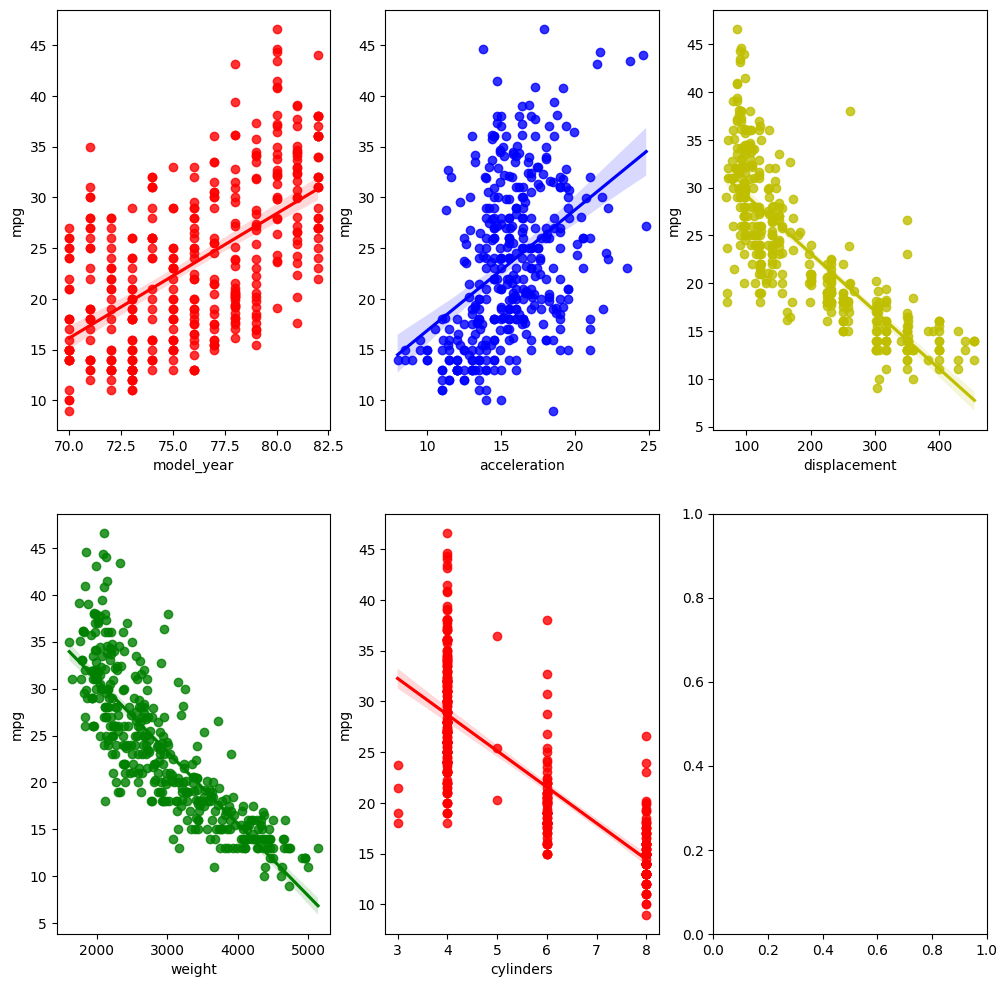

In [11]:
# 마무리2: 시각화 - 이렇게하면 되는구나. 오케이
import matplotlib.pyplot as plt
import seaborn as sns

flg, axs = plt.subplots(figsize=(12,12), ncols=3, nrows=2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
# subplots()를 사용하여 독립 변수인 5개 피처 ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']와,
# 종속 변수인 연비 mpg와의 회귀 관계를 보여주는 5개 그래프를 2행 3열 구조로 나타냄
for i, feature in enumerate(x_features):
    row = int(i/3) # 0,1 -> 2행
    col = i%3 # 0,1,2 -> 3열
    sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])


In [12]:
# Step2: 완성된 자동차 연비 예측 모델을 사용하여 임의의 데이터를 입력하면 연비를 예측해줌!
    # *만든 모델로, => 이렇게 활용까지 가는구나
    # 5개 항목(독립 변수)을 입력하면 변수에 저장하고 => 변수를 회귀 모델에 적용하여 예측 결과값을 구함
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")
cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

input_data = pd.DataFrame([[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]],
                          columns=['cylinders', 'displacement', 'weight', 'acceleration', 'model_year'])

mpg_predict = lr.predict(input_data)
print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)
# f포맷팅만이 진리라고 생각했는데, 이렇게 소수점제한등을 함수없이 하려면 이게 좋네
# {round(mpg_predict)}는 에러남 -> mpg_predict가 [값] -> 리스트로 나오는데 %는 이걸 뚫네..?흠

# 잠깐! 경고문이 뜸
    # C:\Users\A\AppData\Local\Temp\ipykernel_11604\792905533.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
    #   print("이 자동차의 예상 연비(MPG)는 %.2f입니다." %mpg_predict)
# 왜 이러는가? -> https://chat.openai.com/c/31755046-2231-45f5-be9e-bfbb302b83b0

연비를 예측하고 싶은 차의 정보를 입력해주세요.


ValueError: invalid literal for int() with base 10: ''